In [ ]:
import pandas as pd
from google.colab import files
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera
import matplotlib.pyplot as plt
from statsmodels.graphics.api import plot_leverage_resid2, influence_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
uploaded = files.upload()

Saving highway_interurban_yearly_agg.csv to highway_interurban_yearly_agg.csv
Saving deflator_yearly_agg.csv to deflator_yearly_agg.csv
Saving gdp_norm_monthly_agg.csv to gdp_norm_monthly_agg.csv
Saving general_cpi_monthly_agg.csv to general_cpi_monthly_agg.csv
Saving Household_debt_yearly_agg.csv to Household_debt_yearly_agg.csv
Saving Santiago_gdp_yearly_agg.csv to Santiago_gdp_yearly_agg.csv


In [ ]:
df_cpi=pd.read_csv("general_cpi_monthly_agg.csv")
df_gdp_s=pd.read_csv("Santiago_gdp_yearly_agg.csv")
df_highway = pd.read_csv("highway_interurban_yearly_agg.csv")
df_debt = pd.read_csv("Household_debt_yearly_agg.csv")

Aggregating monthly data to years

In [ ]:
# df_cpi

In [ ]:
df_cpi_yearly_avg = df_cpi.groupby('YEAR')[['LIKELIHOODOFDEFAULT', 'IPC']].mean().reset_index()
df_cpi_yearly_avg.columns = ['YEAR', 'Default%', 'IPC']
df_cpi_yearly_avg = df_cpi_yearly_avg.rename(columns={'IPC': 'CPI'})
df_cpi_yearly_avg

,YEAR,Default%,CPI
0,2009,0.065099,58.250833
1,2010,0.094541,59.073333
2,2011,0.100884,61.045833
3,2012,0.107263,62.880000
4,2013,0.066995,64.095000
5,2014,0.073519,66.911667
6,2015,0.081137,69.823333
7,2016,0.097418,72.466667
8,2017,0.097344,74.048333
9,2018,0.097419,75.761667


In [ ]:
# df_gdp_s

In [ ]:
df_gdp_s_yearly = df_gdp_s[['YEAR', 'GDP(million_pesos)']]
df_gdp_s_yearly

,YEAR,GDP(million_pesos)
0,2013,57950.692393
1,2014,61747.513018
2,2015,67395.594568
3,2016,72096.318083
4,2017,75041.892228
5,2018,79326.313684
6,2019,82149.481470
7,2020,79602.544458
8,2021,91828.491152
9,2022,99978.597924


In [ ]:
# df_highway

In [ ]:
df_highway_yearly = df_highway[['YEAR', 'INDEX']]
df_highway_yearly = df_highway_yearly.rename(columns={'INDEX': 'Highway Index'})
df_highway_yearly


,YEAR,Highway Index
0,2014,9.557303e+06
1,2015,1.048325e+07
2,2016,1.182673e+07
3,2017,1.352149e+07
4,2018,1.735575e+07
5,2019,2.167174e+07
6,2020,1.624858e+07
7,2021,2.206913e+07
8,2022,2.501330e+07
9,2023,2.450204e+07


In [ ]:
# df_debt

In [ ]:
df_debt_yearly = df_debt[['YEAR', 'Debt(%GDP)']]
df_debt_yearly

,YEAR,Debt(%GDP)
0,2006,26.392439
1,2007,29.027133
2,2008,32.631886
3,2009,33.905979
4,2010,32.583076
5,2011,33.805600
6,2012,35.339992
7,2013,37.279834
8,2014,39.367669
9,2015,41.261339


Merging for Analysis

In [ ]:
# Outer merge, retaining all info
merged_df_1 = pd.merge(df_cpi_yearly_avg, df_gdp_s_yearly, on='YEAR', how='outer')
merged_df_2 = pd.merge(merged_df_1, df_highway_yearly, on='YEAR', how='outer')
final_df = pd.merge(merged_df_2, df_debt_yearly, on='YEAR', how='outer')
final_df = final_df.sort_values(by='YEAR')
final_df = final_df.reset_index(drop=True)
final_df

,YEAR,Default%,CPI,GDP(million_pesos),Highway Index,Debt(%GDP)
0,2006,NaN,NaN,NaN,NaN,26.392439
1,2007,NaN,NaN,NaN,NaN,29.027133
2,2008,NaN,NaN,NaN,NaN,32.631886
3,2009,0.065099,58.250833,NaN,NaN,33.905979
4,2010,0.094541,59.073333,NaN,NaN,32.583076
5,2011,0.100884,61.045833,NaN,NaN,33.805600
6,2012,0.107263,62.880000,NaN,NaN,35.339992
7,2013,0.066995,64.095000,57950.692393,NaN,37.279834
8,2014,0.073519,66.911667,61747.513018,9.557303e+06,39.367669
9,2015,0.081137,69.823333,67395.594568,1.048325e+07,41.261339


In [ ]:
final_df_cleaned = final_df.dropna()

Y = final_df_cleaned['Default%']
X = final_df_cleaned[['CPI', 'GDP(million_pesos)', 'Highway Index', 'Debt(%GDP)']]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Default%   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     18.22
Date:                Wed, 03 Apr 2024   Prob (F-statistic):            0.00784
Time:                        08:19:23   Log-Likelihood:                 30.584
No. Observations:                   9   AIC:                            -51.17
Df Residuals:                       4   BIC:                            -50.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3278      0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
print("\nKey Statistics:")
# Coefficients
print("\nCoefficients:")
for param in model.params.index:
    print(f"{param}: {model.params[param]}")

# P-values
print("\nP-values:")
for pval in model.pvalues.index:
    print(f"{pval}: {model.pvalues[pval]}")

# R-squared
print(f"\nR-squared: {model.rsquared}")
print(f"Adj. R-squared: {model.rsquared_adj}")

# Standard Errors
print("\nStandard Errors:")
for stderr in model.bse.index:
    print(f"{stderr}: {model.bse[stderr]}")

# Durbin-Watson
print(f"Durbin-Watson: {sm.stats.stattools.durbin_watson(model.resid)}")

# Jarque-Bera test
jb_test = jarque_bera(model.resid)
jb, prob_jb, skew, kurtosis = jb_test
print(f"Jarque-Bera (JB): {jb}")
print(f"Prob(JB): {prob_jb}")
print(f"Skew: {skew}")
print(f"Kurtosis: {kurtosis}")



Key Statistics:

Coefficients:
const: -0.08046110797434512
CPI: 0.002630399245602439
GDP(million_pesos): 2.376201248374267e-06
Highway Index: -1.2215068394229311e-09
Debt(%GDP): -0.0011673725152961756

P-values:
const: 0.2326378474837456
CPI: 0.11786218506864342
GDP(million_pesos): 0.08723144699075042
Highway Index: 0.008010565327169454
Debt(%GDP): 0.2277110184672604

R-squared: 0.9920427198399313
Adj. R-squared: 0.9840854396798626

Standard Errors:
const: 0.0572553877791099
CPI: 0.0013238439458235246
GDP(million_pesos): 1.0540874128135958e-06
Highway Index: 2.4899249579782085e-10
Debt(%GDP): 0.0008201255936641446
Durbin-Watson: 2.2584098757728697
Jarque-Bera (JB): 0.10590534738507003
Prob(JB): 0.9484248968684603
Skew: 0.07979358938025673
Kurtosis: 2.493101398632054


Accounting for multicollinearity

In [ ]:
# Outer merge, retaining all info
merged_df_1 = pd.merge(df_cpi_yearly_avg, df_highway_yearly, on='YEAR', how='outer')
final_df = pd.merge(merged_df_1, df_debt_yearly, on='YEAR', how='outer')
final_df = final_df.sort_values(by='YEAR')
final_df = final_df.reset_index(drop=True)
final_df

,YEAR,Default%,CPI,Highway Index,Debt(%GDP)
0,2006,NaN,NaN,NaN,26.392439
1,2007,NaN,NaN,NaN,29.027133
2,2008,NaN,NaN,NaN,32.631886
3,2009,0.065099,58.250833,NaN,33.905979
4,2010,0.094541,59.073333,NaN,32.583076
5,2011,0.100884,61.045833,NaN,33.805600
6,2012,0.107263,62.880000,NaN,35.339992
7,2013,0.066995,64.095000,NaN,37.279834
8,2014,0.073519,66.911667,9.557303e+06,39.367669
9,2015,0.081137,69.823333,1.048325e+07,41.261339


In [ ]:

# Assuming final_df is already defined and contains the data
final_df_cleaned = final_df.dropna()

Y = final_df_cleaned['Default%']
X = final_df_cleaned[['CPI', 'Highway Index', 'Debt(%GDP)']]

# Checking for multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Drop the variable with the highest VIF (if it's too high)
# Example: X = X.drop(columns=['VariableWithHighVIF'])

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())


         feature         VIF
0            CPI  337.765504
1  Highway Index   24.597169
2     Debt(%GDP)  249.914074
                            OLS Regression Results                            
Dep. Variable:               Default%   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     30.25
Date:                Wed, 03 Apr 2024   Prob (F-statistic):            0.00125
Time:                        09:10:02   Log-Likelihood:                 30.568
No. Observations:                   9   AIC:                            -53.14
Df Residuals:                       5   BIC:                            -52.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
final_df_cleaned = final_df.dropna()

Y = final_df_cleaned['Default%']
X = final_df_cleaned[['CPI', 'Highway Index', 'Debt(%GDP)']]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Default%   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     30.25
Date:                Wed, 03 Apr 2024   Prob (F-statistic):            0.00125
Time:                        09:08:10   Log-Likelihood:                 30.568
No. Observations:                   9   AIC:                            -53.14
Df Residuals:                       5   BIC:                            -52.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3283      0.103     -3.190

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Visualization

Do not include this in report it sucks

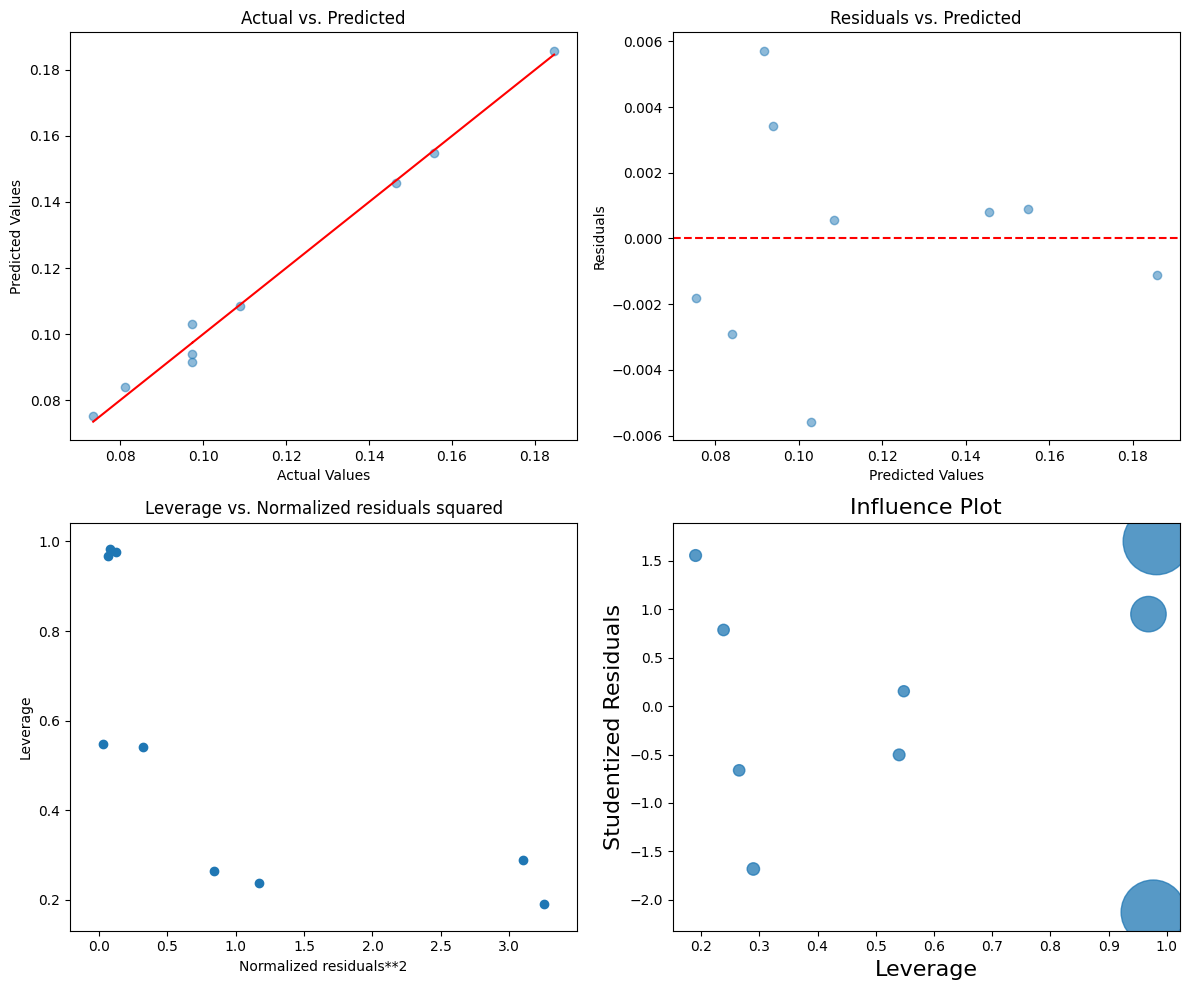

In [ ]:
# Creating a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting Actual vs. Predicted Values
axs[0, 0].scatter(Y, model.predict(X), alpha=0.5)
axs[0, 0].plot(Y, Y, color='red')  # Line for perfect predictions
axs[0, 0].set_title('Actual vs. Predicted')
axs[0, 0].set_xlabel('Actual Values')
axs[0, 0].set_ylabel('Predicted Values')

# Plotting Residuals
axs[0, 1].scatter(model.predict(X), model.resid, alpha=0.5)
axs[0, 1].axhline(y=0, color='red', linestyle='--')
axs[0, 1].set_title('Residuals vs. Predicted')
axs[0, 1].set_xlabel('Predicted Values')
axs[0, 1].set_ylabel('Residuals')

# Leverage vs. Residuals Squared
fig_leverage = plt.subplot(2, 2, 3)
plot_leverage_resid2(model, ax=fig_leverage)

# Influence Plot
fig_influence = plt.subplot(2, 2, 4)
influence_plot(model, ax=fig_influence)

plt.tight_layout()
plt.show()
